<a href="https://colab.research.google.com/github/ymsang/AI_projects/blob/main/vgames_%EC%83%81%EC%9C%A0%EB%AF%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video Games 데이터 분석 보고서

목적: 
- 다음 분기에 어떤 게임을 설계해야 할까

분석분야: 
1. 지역에 따라서 선호하는 게임 장르가 다를까 
2. 연도별 게임의 트렌드가 있을까 
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
4. 나라별 sales 연관성



##Code

설명: 데이터 업로드

In [313]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns

# read data as df
from google.colab import files
# uploaded = files.upload()

import io
df = pd.read_csv('vgames2.csv', index_col=0)
df



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


##전처리

전처리 진행 사항 요약:
- Sales 를 M 값으로 통합
- 년도 4자리로 통일하게 수정
- missingdata 를 0 또는 제거


In [314]:
#erase M

df['NA_Sales'] = df['NA_Sales'].str.replace("M","")
df['EU_Sales'] = df['EU_Sales'].str.replace("M","")
df['JP_Sales'] = df['JP_Sales'].str.replace("M","")
df['Other_Sales'] = df['Other_Sales'].str.replace("M","")

#df.dtypes 

In [315]:
def value_to_float(x):  #erase K and divide by 1000
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            x= float(x.replace('K', '')) / 1000
    return float(x)

#tesing with NA
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)

In [305]:
df.iloc[5296] #value is correct

Name               Forza Motorsport 5
Platform                         XOne
Year                             2013
Genre                          Racing
Publisher      Microsoft Game Studios
NA_Sales                         1.21
EU_Sales                         0.78
JP_Sales                         0.01
Other_Sales                      0.17
Total_Sales                      2.17
Interval                        2010s
Name: 5297, dtype: object

In [306]:
#apply to other sales column
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [307]:
df.iloc[5296] #value is correct

Name               Forza Motorsport 5
Platform                         XOne
Year                             2013
Genre                          Racing
Publisher      Microsoft Game Studios
NA_Sales                         1.21
EU_Sales                         0.78
JP_Sales                         0.01
Other_Sales                      0.17
Total_Sales                      2.17
Interval                        2010s
Name: 5297, dtype: object

In [308]:
df.dtypes #sales float 로 변경 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
Interval        object
dtype: object

현재까지: 
- df upload
- sales 를 million 값으로 모두 처리
- null 요약: 
    - Year: 271
    - Genre: 50
    - Publisher: 58

In [309]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
Interval        0
dtype: int64

In [310]:
def clean_year(x):
    if x < 20:
        x = x + 2000
    else:
        if 60 < x < 99:
            x = x + 1900
    return x

#fix 2-digit data and change to int or float
df['Year']= df['Year'].apply(clean_year)


In [311]:
df.iloc[2429] #value is correct

Name              Casper
Platform              PS
Year                1996
Genre          Adventure
Publisher      Interplay
NA_Sales            0.46
EU_Sales            0.31
JP_Sales               0
Other_Sales         0.05
Total_Sales         0.82
Interval           1990s
Name: 2430, dtype: object

In [312]:
#fill Nan in 'year' to 0, change to int
df['Year']= df['Year'].fillna(0).astype(int)


#Q1. 지역에 따라서 선호하는 게임 장르가 다를까

진행 순서:
1. genre 종류 파악
2. genre 그룹별로 묶어 means 를 확인
3. 표로 결과 시각화 



##Code

In [173]:
#Genre 종류 보기
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [174]:
#df1= genre + location 
gen_loc = {'Genre': df['Genre'], 'NA': df['NA_Sales'], 'EU': df['EU_Sales'], 'JP': df['JP_Sales'], 'Other': df['Other_Sales']}

df1= pd.DataFrame(data=gen_loc)


In [175]:
#grouby 이용해서 그룹별로 나누기이용해서 그룹별로 나누기

df_genre= df1.groupby(['Genre'], as_index=False).mean()
df_genre

,Genre,NA,EU,JP,Other
0,Action,0.264693,0.157991,0.047776,0.056415
1,Adventure,0.082547,0.050039,0.040586,0.013133
2,Fighting,0.263518,0.119504,0.103117,0.043259
3,Misc,0.235323,0.122468,0.060709,0.042699
4,Platform,0.505023,0.228066,0.147794,0.058292
5,Puzzle,0.213408,0.087768,0.098391,0.021661
6,Racing,0.287361,0.190748,0.045374,0.062027
7,Role-Playing,0.215469,0.123790,0.232603,0.038409
8,Shooter,0.444893,0.239335,0.029266,0.078479
9,Simulation,0.211514,0.131040,0.073642,0.036393


####Tidy
df name: tidy_genre

In [316]:
#sns 시각화를 위해 tidy 형태로 변형
tidy_genre = df_genre.reset_index()
tidy_genre= tidy_genre.melt(id_vars = 'Genre', value_vars = ['NA', 'EU', 'JP', 'Other'])
tidy_genre

#rename column
tidy_genre = tidy_genre.rename(
    columns = {
        'variable': 'Country', 
        'value': 'Mean of Sales'
        })
tidy_genre

,Genre,Country,Mean of Sales
0,Action,NA,0.264693
1,Adventure,NA,0.082547
2,Fighting,NA,0.263518
3,Misc,NA,0.235323
4,Platform,NA,0.505023
5,Puzzle,NA,0.213408
6,Racing,NA,0.287361
7,Role-Playing,NA,0.215469
8,Shooter,NA,0.444893
9,Simulation,NA,0.211514


##Visualization

### Bar Plot: Sales Mean for each genre organized by country

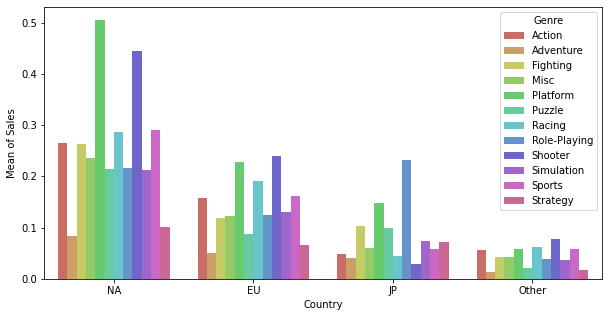

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
#barplot

plt.figure(figsize=(10,5))
sns.barplot(x= 'Country', y= 'Mean of Sales', hue= 'Genre', palette = 'hls', data=tidy_genre)
plt.show()
# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

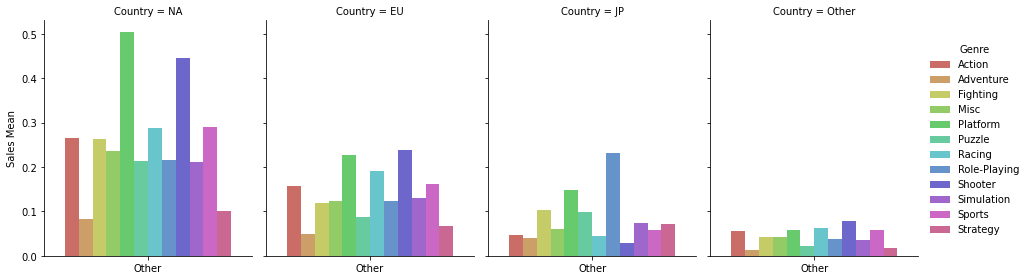

In [178]:
#make separate graphs by country
g = sns.FacetGrid(data = tidy_genre, col = 'Country', height=4, aspect=.8)

g.map_dataframe(
    sns.barplot,
    x = 'Country',
    y = 'Mean of Sales',
    hue = 'Genre', # color
    palette = 'hls',
    data = tidy_genre
)
g.add_legend();
g.set_axis_labels("", "Sales Mean")
g.legend.set_title("Genre")

###Pie Chart: ratio of genre for each country

####Code

In [179]:
#organize list by largest for each region

NA_genre_list= df_genre.nlargest(1, 'NA'). drop(['EU', 'JP', 'Other'], axis=1)
print(NA_genre_list)
print("---------------------------------")
EU_genre_list= df_genre.nlargest(1, 'EU'). drop(['NA', 'JP', 'Other'], axis=1)
print(EU_genre_list)
print("---------------------------------")
JP_genre_list= df_genre.nlargest(1, 'JP'). drop(['NA', 'EU', 'Other'], axis=1)
print(JP_genre_list)
print("---------------------------------")
Other_genre_list= df_genre.nlargest(1, 'Other'). drop(['NA', 'EU', 'JP'], axis=1)
print(Other_genre_list)

      Genre        NA
4  Platform  0.505023
---------------------------------
     Genre        EU
8  Shooter  0.239335
---------------------------------
          Genre        JP
7  Role-Playing  0.232603
---------------------------------
     Genre     Other
8  Shooter  0.078479


####Pie Chart

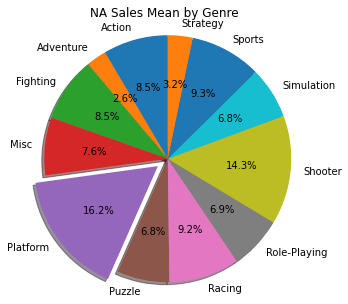

In [180]:
#NA pie chart
explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))

ax1.pie(df_genre['NA'], explode=explode, labels=df_genre['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("NA Sales Mean by Genre")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


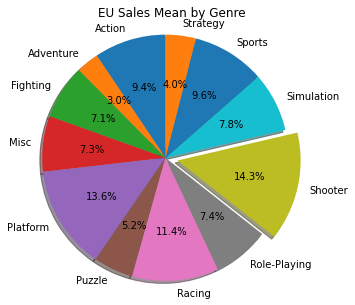

In [181]:
#EU
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0)
fig2, ax2 = plt.subplots(figsize=(5,5))

ax2.pie(df_genre['EU'], explode=explode, labels=df_genre['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title("EU Sales Mean by Genre")
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

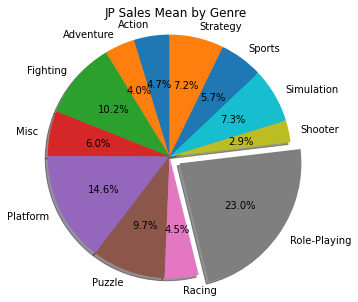

In [182]:
#JP
explode = (0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0)
fig3, ax3 = plt.subplots(figsize=(5,5))

ax3.pie(df_genre['JP'], explode=explode, labels=df_genre['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.set_title("JP Sales Mean by Genre")
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

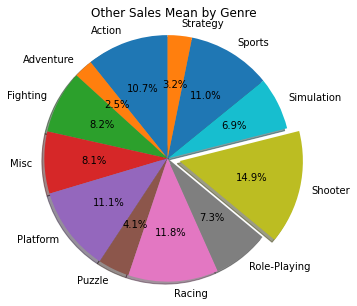

In [183]:
#Other
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0)
fig4, ax4 = plt.subplots(figsize=(5,5))
ax4.pie(df_genre['Other']*10, explode=explode, labels=df_genre['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.set_title("Other Sales Mean by Genre")
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##Findings: 
- 북미에서는 Platform, Shooter, sports, racing action 순으로 많이 팔렸다. 
- Europe 에서는 1위가 Shooter 이며 shooter>platform>racing>sports>action 순이였다 
- 일본에서는 특이하게 Role-playing 이 1위로 나타났다. 그 다음 순위는 platform, fighting, puzzle, simulation 으로 북미와 유럽에 비해 싸움과 액션보다는 시뮬레이션, 퍼즐 위주의 게임이 많이 팔림을 볼 수 있다. 
- 그 외 Other 에서는 shooter 이 가장 많이 팔렸으며 그 이후는 racing, platform, sports, action 등으로 북미와 유럽의 최고 5순위와 비슷했다. 

#Q2. 연도별 게임의 트렌드가 있을까 
- year vs genre

##Code

In [184]:

#df2= year+ genre
year_genre = {'Year2': df['Year'], 'Genre2': df['Genre'], 'Count': 1 }

df2= pd.DataFrame(data=year_genre)
df2

,Year2,Genre2,Count
1,2008,Action,1
2,2009,Action,1
3,2010,Adventure,1
4,2010,Misc,1
5,2010,Platform,1
...,...,...,...
16594,2006,Platform,1
16595,2005,Action,1
16596,2015,Sports,1
16597,2013,Action,1


In [185]:
#rid null values
df2=df2.dropna()
df2 = df2.loc[(df2[['Year2']] != 0).all(axis=1)]  #drop row with year:0


In [186]:
df2_tidy= df2.groupby(['Year2', 'Genre2'], as_index=False)['Count'].count()
df2_tidy

,Year2,Genre2,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


##10년별로 year 정리


In [266]:
#decade 별 새로운 카테고리 "interval" 만들기

df_decade= df

df_decade['Interval'] = (10 * (df['Year'] // 10)).astype(str) + 's'
df_decade= df.drop({'Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}, axis=1) #drop Sales column
df_decade = df_decade.loc[(df_decade[['Interval']] != "0s").all(axis=1)] #drop "0s" column in ['Interval']
df_decade = df_decade.loc[(df_decade[['Interval']] != "2020s").all(axis=1)] #drop "2020s" column in ['Interval'] - only 1 value

In [267]:
#interval sums
df_decade.groupby(df_decade['Interval'], as_index=False).count()


,Interval,Name,Platform,Genre,Publisher,Total_Sales
0,1980s,205,205,204,205,205
1,1990s,1769,1769,1764,1769,1769
2,2000s,9208,9208,9178,9183,9208
3,2010s,5144,5144,5130,5133,5144


In [281]:
df_decade['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [268]:
#interval sums
df_decade.groupby((df_decade['Interval']), as_index=False).mean()


,Interval,Total_Sales
0,1980s,1.836488
1,1990s,0.722855
2,2000s,0.503965
3,2010s,0.489862


###Genre

In [269]:
#ddf_g= interval + genre
decade_genre = {'Decade': df_decade['Interval'], 'Genre': df_decade['Genre'], 'Sales': df_decade['Total_Sales'] }

ddf_g= pd.DataFrame(data=decade_genre)
ddf_g

#decade tidy 
ddf_g= ddf_g.groupby(['Decade', 'Genre'], as_index=False)['Sales'].mean()
ddf_g

,Decade,Genre,Sales
0,1980s,Action,0.774242
1,1980s,Adventure,2.390000
2,1980s,Fighting,1.810000
3,1980s,Misc,1.055000
4,1980s,Platform,3.704848
5,1980s,Puzzle,3.302632
6,1980s,Racing,1.512500
7,1980s,Role-Playing,1.694444
8,1980s,Shooter,1.992333
9,1980s,Simulation,0.170000


#Decade vs Publisher




In [288]:
# ddf_p: decade vs publisher 

decade_pub = {'Decade': df_decade['Interval'], 'Publisher': df_decade['Publisher'], 'Sales': df_decade['Total_Sales'] }

ddf_pub= pd.DataFrame(data=decade_pub)
ddf_pub

#decade tidy 
ddf_pub= ddf_pub.groupby(['Decade', 'Publisher'], as_index=False)['Sales'].mean()
ddf_pub['Publisher'].value_counts().nlargest(10)

Atari                           4
Konami Digital Entertainment    4
Taito                           4
Capcom                          4
Unknown                         4
Hudson Soft                     4
Namco Bandai Games              4
Activision                      4
Nintendo                        4
Sega                            4
Name: Publisher, dtype: int64

In [289]:
ddf_pub

,Decade,Publisher,Sales
0,1980s,20th Century Fox Video Games,0.386000
1,1980s,Activision,0.709231
2,1980s,Answer Software,0.500000
3,1980s,Atari,0.982381
4,1980s,Avalon Interactive,0.160000
...,...,...,...
826,2010s,dramatic create,0.022000
827,2010s,iWin,0.060000
828,2010s,imageepoch Inc.,0.020000
829,2010s,inXile Entertainment,0.090000


##Visualization

df 정의: 
- df2_tidy: 전체 year + genre tidy data 
- ddf: "Year" categorized by decade

Text(0.5, 1.0, 'Total number of Games per Genre')

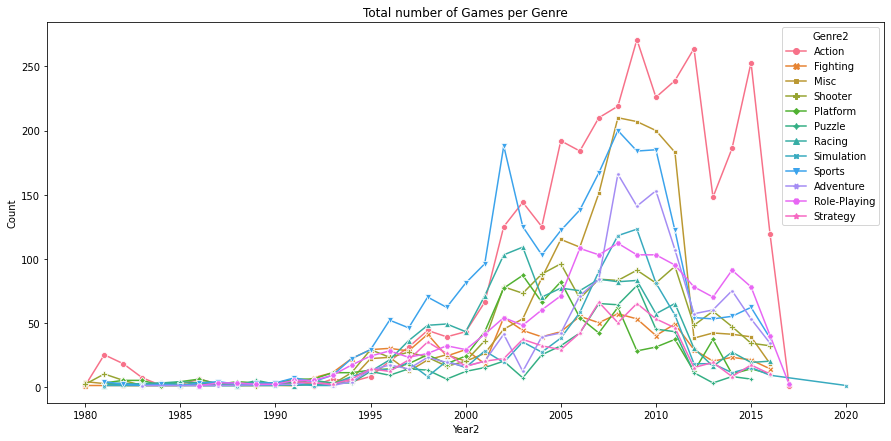

In [278]:
#lineplot
plt.figure(figsize=(15,7))
sns.lineplot(x='Year2', y='Count', hue= 'Genre2', style= "Genre2", markers=True, dashes=False, data=df2_tidy).set_title("Total number of Games per Genre")

Text(0.5, 1.0, 'Mean of Sales: Genres')

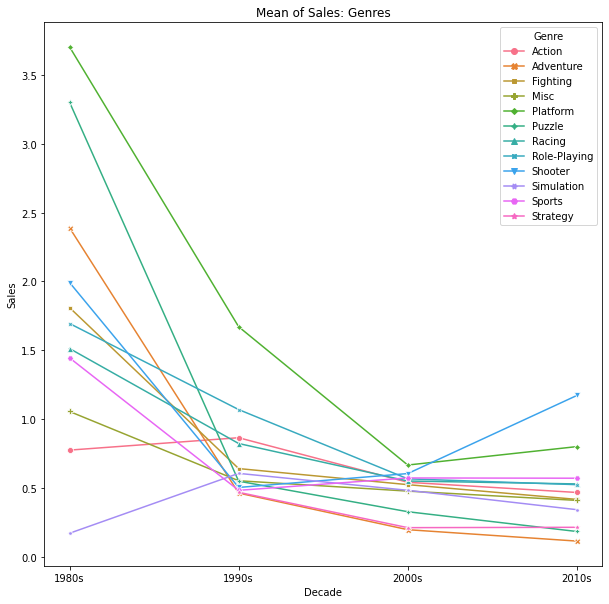

In [276]:
#lineplot- decade- genre
plt.figure(figsize=(10,10))
sns.lineplot(x='Decade', y='Sales', hue= 'Genre', style= "Genre", markers=True, dashes=False, data=ddf_g).set_title("Mean of Sales: Genres")

##Findings: 

- 2005년도부터 2015년까지 Action 장르가 가장 많이 출시됨
- Simulation 은 1995 부터 2000초반까지 가장 많이 출기가 되었다가 Action 게임으로 2위로 밀려났음
- 2010년도 초반까지는 Action과 simulation 이 가장 많은 출시를 보였지만 2010년도 초반부터 role-playing 이 simulation장르를 앞서나가고 있음 

#Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


1. find top 50 games 
- check for each location (NA, EU, JP, Other)- maybe
2. top10 게임들의 장르, 플랫폼, 회사, 년도(?) 분석
3. find:
 - 어느 플랫폼을 선호하는지
 - 어느 회사가 인기 게임을 만드는지
 - sales 비교


##Code: new df for top 50 games
- new df for top 50 games

In [191]:
import numpy as np
#find total sales number 
df['Total_Sales']= df['EU_Sales']+ df['JP_Sales'] + df['Other_Sales']+ df['NA_Sales']
df

#find top 10 sales games and create new df
top_df= df.nlargest(50, 'Total_Sales')
top_df= top_df.rename_axis('id').reset_index()
top_df= top_df.drop(['id'], axis=1)
top_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [192]:
#find values for Genre and Platform
top_df_genre= top_df['Genre'].unique()
top_df_plat= top_df['Platform'].unique()
top_df_pub= top_df['Publisher'].unique()

print("Genre:", top_df_genre)
print("--------------------------")
print("Platform:", top_df_plat)
print("--------------------------")
print("Publisher:", top_df_pub)

Genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' nan 'Fighting']
--------------------------
Platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64']
--------------------------
Publisher: ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision']


##Top 50 report

In [193]:
#50위 게임들의 Publisher values
pub_count= [top_df['Publisher'].value_counts()]
pub_count

[Nintendo                       32
 Activision                      8
 Take-Two Interactive            6
 Sony Computer Entertainment     2
 Microsoft Game Studios          2
 Name: Publisher, dtype: int64]

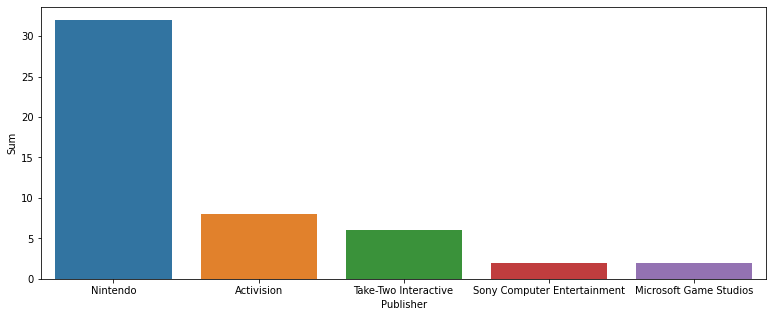

In [194]:
#create bar chart for Publisher

pub = {'Publisher': ["Nintendo", "Activision", "Take-Two Interactive", "Sony Computer Entertainment", "Microsoft Game Studios"], 
      'Sum': [32, 8, 6, 2, 2]}

pub_bar= pd.DataFrame(data=pub)
pub_bar

#platform bar chart

plt.figure(figsize=(13,5))
sns.barplot(x= 'Publisher', y= 'Sum', data=pub_bar)
plt.show()


In [224]:
#Nintendo 게임들 
Nintendo= top_df[top_df['Publisher'].isin(['Nintendo'])]
Nintendo.drop({'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}, axis=1)
Nintendo['Total_Sales'].sum()

739.62

In [196]:
#50위 게임들의 Platform values
platform_count= [top_df['Platform'].value_counts()]
platform_count

[Wii     9
 DS      9
 X360    7
 GB      5
 PS2     5
 PS3     4
 NES     3
 3DS     3
 PS4     2
 N64     1
 SNES    1
 GBA     1
 Name: Platform, dtype: int64]

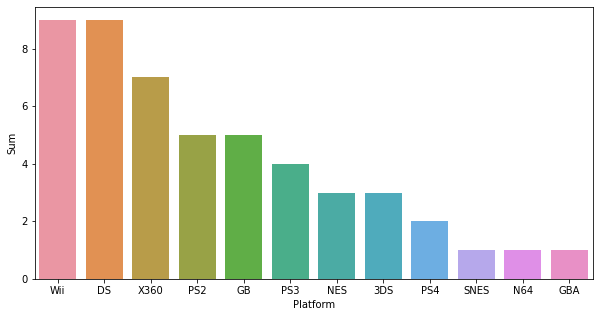

In [197]:
#create bar chart for Platform 
pl = {'Platform': ["Wii", "DS", "X360", "PS2", "GB", "PS3", "NES", "3DS", "PS4", "SNES", "N64", "GBA"], 
      'Sum': [9, 9, 7, 5, 5, 4, 3, 3, 2, 1, 1, 1]}

platform_bar= pd.DataFrame(data=pl)
platform_bar

#platform bar chart

plt.figure(figsize=(10,5))
sns.barplot(x= 'Platform', y= 'Sum', data=platform_bar)
plt.show()

In [213]:
wii= top_df[top_df['Platform'].isin(['Wii'])]
DS= top_df[top_df['Platform'].isin(['DS'])]
wii.drop({'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}, axis=1)


,Name,Platform,Year,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7,Wii Play,Wii,2006,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61
13,Wii Fit,Wii,2007,Sports,Nintendo,22.72
14,Wii Fit Plus,Wii,2009,Sports,Nintendo,22.00
39,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,13.04
48,Super Mario Galaxy,Wii,2007,Platform,Nintendo,11.52


In [214]:
DS.drop({'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}, axis=1)

,Name,Platform,Year,Genre,Publisher,Total_Sales
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
10,Nintendogs,DS,2005,Simulation,Nintendo,24.75
11,Mario Kart DS,DS,2005,Racing,Nintendo,23.43
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,20.22
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,18.35
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,15.32
27,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,15.30
41,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,12.28
45,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,11.90


In [199]:
#50위 안에 어느 genre values count
genre_bar=top_df['Genre'].value_counts()
genre_bar

Shooter         10
Platform         8
Action           7
Role-Playing     7
Racing           5
Sports           4
Misc             3
Puzzle           2
Simulation       2
Fighting         1
Name: Genre, dtype: int64

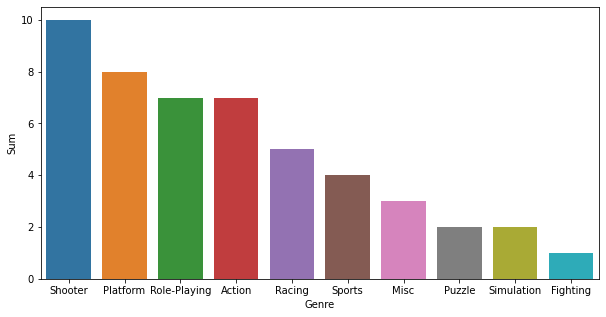

In [200]:
#create bar chart for Genre
genr = {'Genre': ["Shooter", "Platform", "Role-Playing", "Action", "Racing", "Sports", "Misc", "Puzzle", "Simulation", "Fighting"], 
      'Sum': [10, 8, 7, 7, 5, 4, 3, 2, 2, 1]}

genr_bar= pd.DataFrame(data=genr)
genr_bar

#platform bar chart

plt.figure(figsize=(10,5))
sns.barplot(x= 'Genre', y= 'Sum', data=genr_bar)
plt.show()


In [223]:
Shooter = top_df[top_df['Genre'].isin(['Shooter'])]
Platform = top_df[top_df['Genre'].isin(['Platform'])]
RolePlaying = top_df[top_df['Genre'].isin(['Role-Playing'])]
Action = top_df[top_df['Genre'].isin(['Action'])]

# print("Shooter games:", Shooter)
# print("Platform games:",Platform)
# print("RolePlaying games:",RolePlaying)
# print("Action games:",Action)
Shooter
Platform
RolePlaying
Action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
45,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90


##Findings: 

- 우선 전체 중 top 10 sales 와 2000년도 이후 출고된 게임의 top ten을 비교하였다 
- 전체와 2000년이후 게임 비교결과 가장 많은 sales를 기록한 게임회사는 Nintendo 였다. 



#Extra: Sales 숫자로 얻을 수 있는건 없을까? 

##Code

- 나라별 sales 값들을 PCA 이용하여 2차원으로 만들어 비교하기
- 목적: 나라별로 sales 가 상이 하기 때문에 전반적으로 genre 와 platform 별로 어느 게임이 잘 팔리는지 분석

In [301]:
#sales DataFrame
#sales dic
sales= {'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}
#sales 값으로 새로운 df 만들기
sales_df= pd.DataFrame(top_df, columns= sales)
sales_df= sales_df.rename_axis('id').reset_index()
sales_df= sales_df.drop(['id'], axis=1)
sales_df

,NA_Sales,JP_Sales,EU_Sales,Other_Sales
0,41.49,3.77,29.02,8.46
1,29.08,6.81,3.58,0.77
2,15.85,3.79,12.88,3.31
3,15.75,3.28,11.01,2.96
4,11.27,10.22,8.89,1.00
5,23.20,4.22,2.26,0.58
6,11.38,6.50,9.23,2.90
7,14.03,2.93,9.20,2.85
8,14.59,4.70,7.06,2.26
9,26.93,0.28,0.63,0.47


In [302]:
sales_df.corr()

,NA_Sales,JP_Sales,EU_Sales,Other_Sales
NA_Sales,1.000000,0.150437,0.519829,0.254122
JP_Sales,0.150437,1.000000,0.194564,-0.182604
EU_Sales,0.519829,0.194564,1.000000,0.397974
Other_Sales,0.254122,-0.182604,0.397974,1.000000


[[ 4.46892829e+00  4.09406140e-01  5.39551667e+00  3.32323957e+00]
 [ 2.71722110e+00  1.70694019e+00 -4.87575106e-01 -5.69006964e-01]
 [ 8.49768546e-01  4.17942548e-01  1.66308344e+00  7.16598523e-01]
 [ 8.35653258e-01  2.00264138e-01  1.23063920e+00  5.39448161e-01]
 [ 2.03288372e-01  3.16239780e+00  7.40381550e-01 -4.52593869e-01]
 [ 1.88724219e+00  6.01475326e-01 -7.92829868e-01 -6.65174304e-01]
 [ 2.18815189e-01  1.57462587e+00  8.19007776e-01  5.09079527e-01]
 [ 5.92870311e-01  5.08769932e-02  8.12070168e-01  4.83772332e-01]
 [ 6.71915922e-01  8.06349124e-01  3.17187448e-01  1.85147436e-01]
 [ 2.41374242e+00 -1.08019710e+00 -1.16977325e+00 -7.20850132e-01]
 [-1.07247955e-01 -3.75943420e-01  1.22832666e+00  4.33157943e-01]
 [-2.79482695e-03  5.63061489e-01  4.35126788e-01  1.30585124e-02]
 [-1.17128657e-01  1.87340016e+00  1.13684273e-01 -5.99375597e-01]
 [-1.25597829e-01  3.36846670e-01  5.41503447e-01  1.29471608e-01]
 [-1.04424898e-01 -1.19851172e-01  6.71005468e-01 -5.27401936e

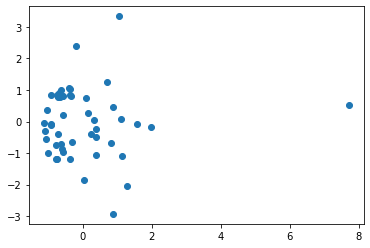

In [295]:
#PCA 사용해서 top 50 games 의 sales 비교하기

import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


top_plat= top_df['Platform']
top_genre_type= top_df['Genre']
total_sales= top_df['Total_Sales']

scaler = StandardScaler()
Z = scaler.fit_transform(sales_df)
print(Z)

pca = PCA(n_components= 2)
pc = pca.fit_transform(Z)
print(pc)

ratio = pca.explained_variance_ratio_
print(ratio)

plt.scatter(pc[:,0], pc[:,1])


In [231]:
ratio

array([0.45259283, 0.29053233])

###Screeplot

Text(0.5, 1.0, 'Scree Plot')

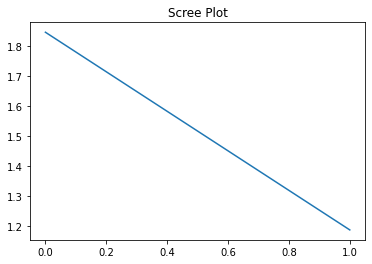

In [299]:
#screeplot
plt.plot(pca.explained_variance_)
plt.title('Scree Plot')

##ScatterPlots (Platform / Genre vs Sales)

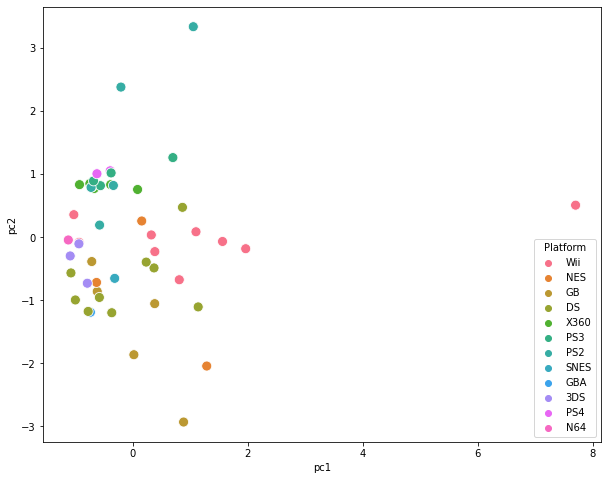

In [298]:
#Platform scatter
new_df= pd.DataFrame({'Platform': top_plat,
                     'pc1': pc[:,0],
                     'pc2': pc[:,1],
                     'sales': total_sales})

new_df
plt.figure(figsize=(10,8))
sns.scatterplot(data= new_df, x= 'pc1', y= 'pc2', hue= 'Platform', s=100)
plt.show()

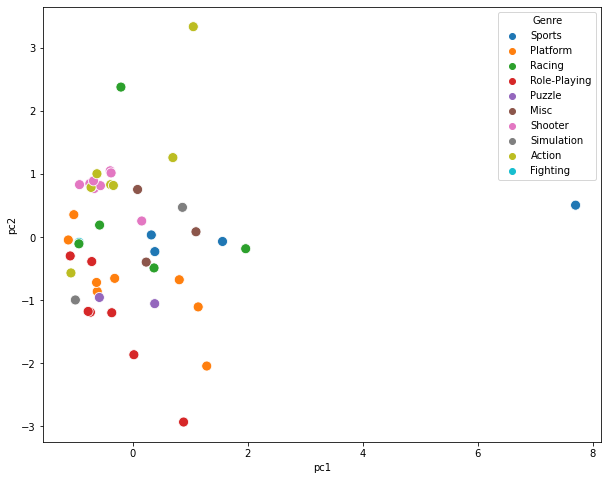

In [228]:
#genre scatter

new_df2= pd.DataFrame({'Genre': top_genre_type,
                     'pc1': pc[:,0],
                     'pc2': pc[:,1]})

new_df2
plt.figure(figsize=(10,8))
sns.scatterplot(data= new_df2, x= 'pc1', y= 'pc2', hue= 'Genre', s=100)

##Findings

- 연관이 없다

#Conclusion